## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
dados['Renda'].max()
## verificando o limite superior da última classe

200000

In [ ]:
classes = [0,(2*788), (5*788),(15*788),(25*788), 200000]
classes ##intervalos das classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [ ]:
labels = ['E','D','C','B','A']
labels


['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
porcentagem = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest= True),
    normalize = True * 100
)
porcentagem

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
df = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': porcentagem})
df

,Frequência,Porcentagem (%)
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


In [ ]:
df.sort_index(ascending=False)
df

,Frequência,Porcentagem (%)
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

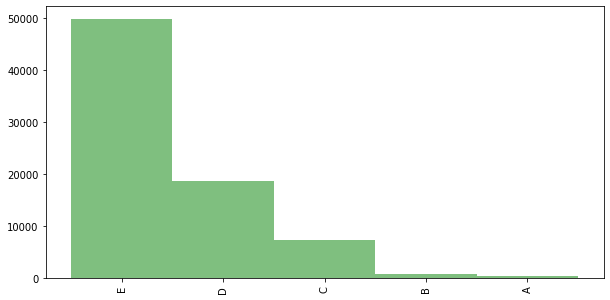

In [ ]:
df['Frequência'].plot.bar(width = 1, color = 'green', alpha = 0.5, figsize = (10,5))

> ### Conclusões

A partir da criação de classes de acordo com as faixas definidas, é possível notar um acumulo maior de pessoas entrevistadas que estão na classe E, recebendo de 0 a 2 salários mínimos, o que nos da o primeiro insigth sobre o conjunto de dados analisado

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [ ]:
idade = dados[['Idade']]
idade


,Idade
0,23
1,23
2,35
3,46
4,47
...,...
76835,46
76836,30
76837,32
76838,57


In [ ]:
n = dados.shape[0]
n


76840

In [ ]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))

17

In [ ]:
labels2 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
          '16','17']

frequencia2 = pd.value_counts(
    pd.cut(
        x = dados.Idade,
        bins = 17,
        labels = labels2,
        include_lowest = True),
    sort = False
)
frequencia2

1       215
2      2291
3      5554
4      9032
5     10786
6     10861
7     10152
8     10041
9      7683
10     5156
11     2755
12     1275
13      647
14      291
15       77
16       20
17        4
Name: Idade, dtype: int64

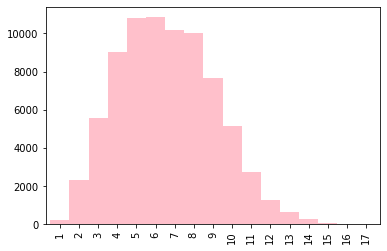

In [ ]:
frequencia2.plot.bar(width = 1, color = 'pink')

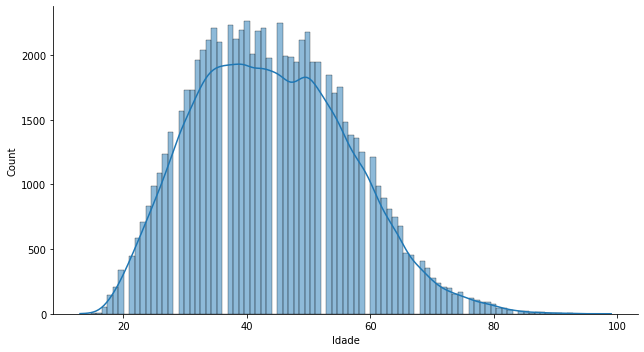

In [ ]:
ax = sns.displot(dados['Idade'], kde = True)
ax.figure.set_size_inches(10,5) #definindo o tamanho do gráfico
ax

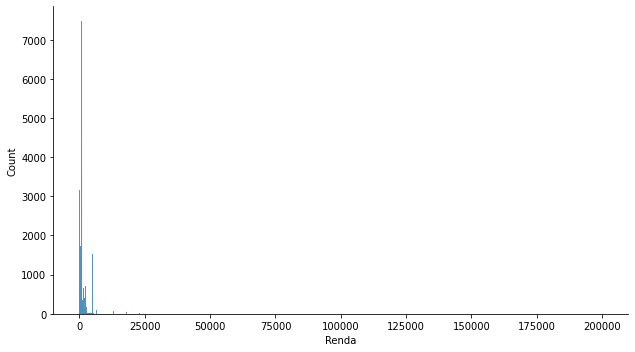

In [ ]:
ax = sns.displot(dados.Renda)
ax.figure.set_size_inches(14,6)
ax

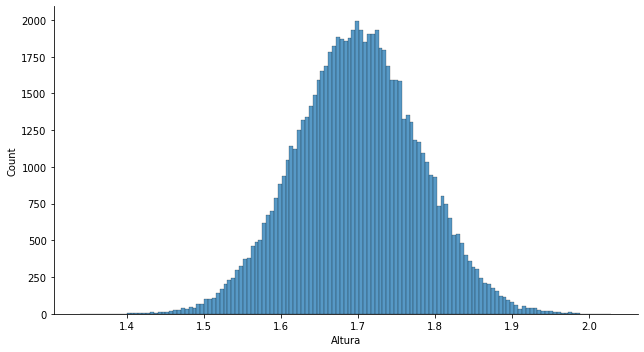

In [ ]:
ax = sns.displot(dados.Altura)
ax.figure.set_size_inches(10,5) #definindo o tamanho do gráfico
ax

> ### Conclusões

Considerando as idades como medidas quantitativas, foi possível gerar um histograma, utilizando a fórmula de divisão de classes fixas. Contudo, não foi possível concluir em que faixa etária há uma maior concentração dos dados, *pois não foi possível definir de quanto a quanto essas classes foram divididas*

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

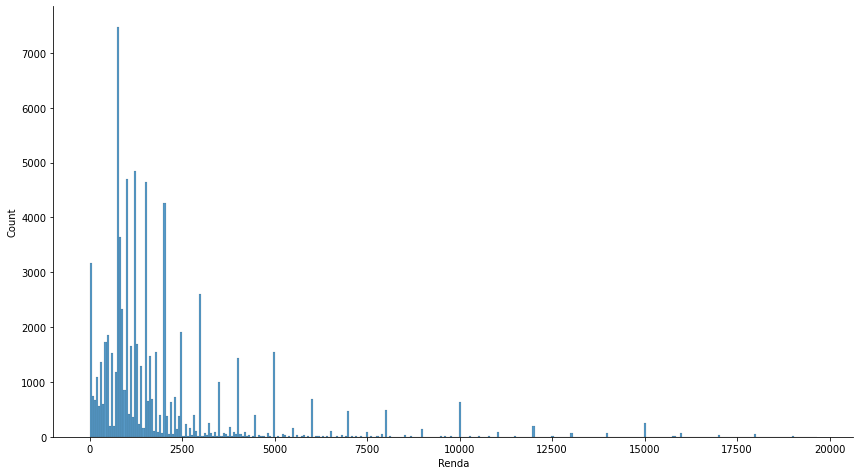

In [ ]:
ax = sns.displot(dados.query('Renda<20000')['Renda'])
ax.figure.set_size_inches(14,7)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)

frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100

frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

É possível observar que a maior concentração de pessoas provedoras de renda das famílias, são os homens pardos, seguido dos homens brancos, o que se repete se comparado ao sexo feminino. O menor índice esta associado aos indígenas, tanto homens, quanto mulheres.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dados.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [ ]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
teste = pd.crosstab(dados.Cor,
                    dados.Sexo,
                    values = dados.Renda,
                    aggfunc = {'mean','median','max'})
teste.rename(index = cor, inplace = True)
teste.rename(columns = sexo, inplace = True)
teste

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

É possível identificar valores discrepantes nos salários máximos se comparados entre as classes de cor, tendo o homem branco ganhando 4 vezes mais que os homens negros, e 20 vezes mais do que o indígena. O mesmo se repete entre as mulheres brancas, tendo rendas superiores a mais de 200% nas mulheres pretas. As médias, apesar de mais próximas ainda mostram pessoas brancas, ganhando mais que as demais raças, e a mediana trásvalores que mostram melhor a disparidade entre os números.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = {'mad','var','std'},
                         values = dados.Renda).round(2)


frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

mad                                          std           \
Cor       Indígena   Branca   Preta  Amarela    Parda  Indígena   Branca   
Sexo                                                                       
Masculino   798.91  2261.01  975.60  3709.60  1125.83   1204.09  4750.79   
Feminino   3007.89  1670.97  705.45  2549.15   811.58  11957.50  3251.01   

                                               var                           \
Cor          Preta  Amarela    Parda      Indígena       Branca       Preta   
Sexo                                                                          
Masculino  1936.31  5740.82  2312.09  1.449841e+06  22570023.41  3749293.59   
Feminino   1349.80  3731.17  1596.23  1.429818e+08  10569086.53  1821959.52   

                                    
Cor            Amarela       Parda  
Sexo                                
Masculino  32957069.62  5345747.15  
Feminino   13921656.88  2547959.94

> ### Conclusões

Possível observar também grande variação entre os dados, perceptível através dos altos desvios em relação a média, o que identificam possíveis outliers dentro da amostra.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

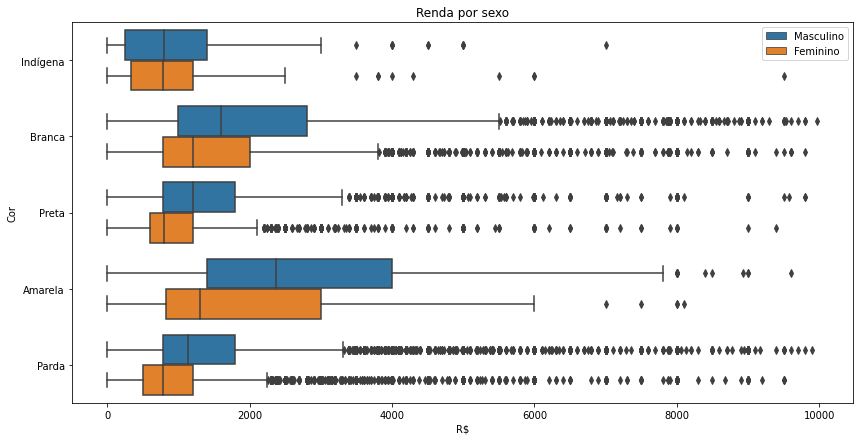

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,7)
ax.set_title('Renda por sexo')
ax.set_yticklabels(['Indígena','Branca','Preta','Amarela','Parda','Sem declaração']) ##configuração do eixo y

handles, _ = ax.get_legend_handles_labels() ##configuração de legenda
ax.legend(handles,['Masculino','Feminino'])
ax.set_xlabel('R$')
ax

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

desafio = stats.percentileofscore(dados.Renda, 788, kind = 'weak')  ##dependendo da necessidade o kind muda
desafio

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
tabela = pd.crosstab(dados['Anos de Estudo'],
                     dados.Sexo,
                     aggfunc = {'mean','median','max','std'},
                     values = dados.Renda)
tabela.rename(index = anos_de_estudo, inplace = True)
tabela.rename(columns = sexo, inplace = True)
tabela

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
[key for key in anos_de_estudo.values()]

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

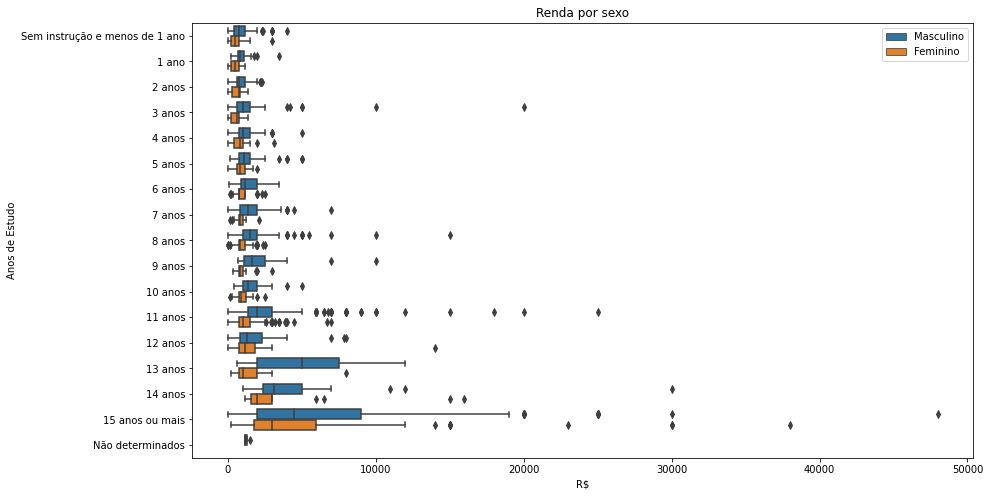

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000' and 'Idade == 50'), orient = 'h')
ax.figure.set_size_inches(14,8)
ax.set_title('Renda por sexo')
ax.set_xlabel('R$')

ax.set_yticklabels([key for key in anos_de_estudo.values()]) ##configuração do eixo y

handles, _ = ax.get_legend_handles_labels() ##configuração de legenda
ax.legend(handles,['Masculino','Feminino'])
ax.set_xlabel('R$')

ax

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
 renda = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

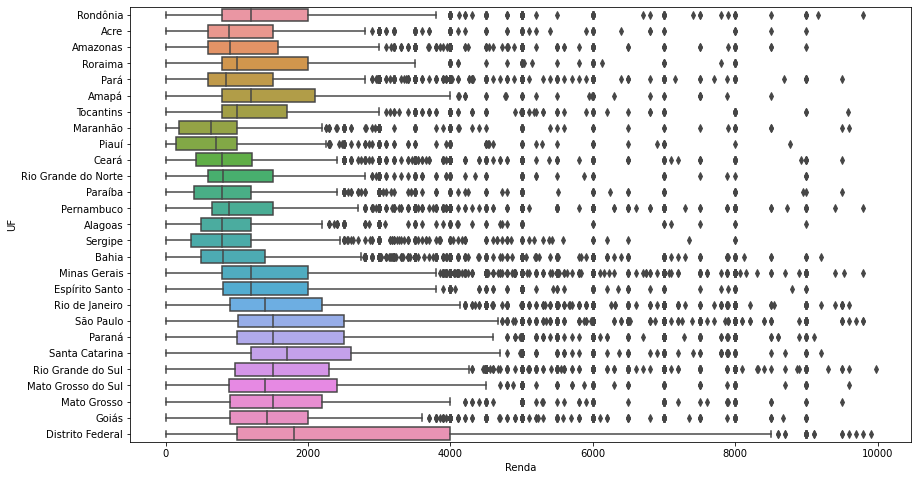

In [ ]:
ax = sns.boxplot(x = 'Renda', y ='UF',  data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,8)

ax.set_yticklabels([i for i in uf.values()])
ax